# Importing important libraries and dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("F:/Programming/Project/Netflix - Python/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic analysis

In [2]:
df.shape

(8807, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Handling NaN (Null values)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.director.fillna("unknown director", inplace=True)
df.cast.fillna("unknown cast", inplace=True)
df.country.fillna("unknown country", inplace=True)
df['country'].nunique()

749

In [8]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [9]:
df.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [10]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Unnestting attributes 

In [12]:
df['country'] = df['country'].str.split(', ')
df=df.explode('country')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown cast,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
#values counts of each category
df.nunique()

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          128
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

In [14]:
df['type'].nunique()

2

In [15]:
df[df.type=='Movie'].nunique()

show_id         6126
type               1
title           6126
director        4353
cast            5444
country          123
date_added      1531
release_year      73
rating            14
duration         205
listed_in        278
description     6100
dtype: int64

In [16]:
df_mov=df.loc[(df['type']=='Movie')]

In [17]:
df_TV=df.loc[(df['type']=='TV Show')]

In [18]:
mov_wise=df_mov[df_mov.country!='unknown country'].groupby('country')['title'].nunique().reset_index()
mov_wise_top10=mov_wise.sort_values('title', ascending=False).head(10)
mov_wise_top10

,country,title
114,United States,2748
43,India,962
112,United Kingdom,532
20,Canada,319
34,France,303
36,Germany,182
100,Spain,171
51,Japan,119
23,China,114
65,Mexico,111


In [19]:
TV_wise=df_TV[df_TV.country!='unknown country'].groupby('country')['title'].nunique().reset_index()
TV_wise_top10=TV_wise.sort_values('title', ascending=False).head(10)
TV_wise_top10

,country,title
63,United States,932
62,United Kingdom,271
30,Japan,197
52,South Korea,170
8,Canada,126
19,France,90
25,India,84
57,Taiwan,70
2,Australia,64
53,Spain,61


# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

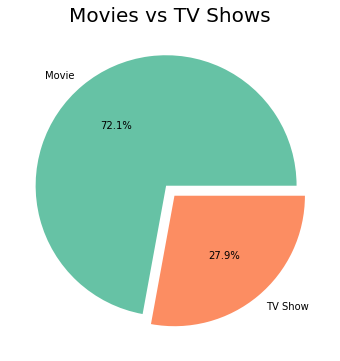

In [21]:
plt.figure(figsize=(10,6))
plt.pie(df.type.value_counts(),explode=(.05,.05), labels=df.type.value_counts().index,autopct='%1.1f%%', colors=sns.color_palette('Set2')
)
plt.title('Movies vs TV Shows', fontsize=20)
plt.show()

## Upon analyzing found that Netflix has more than 72% are movies and around 28% of TV Shows.

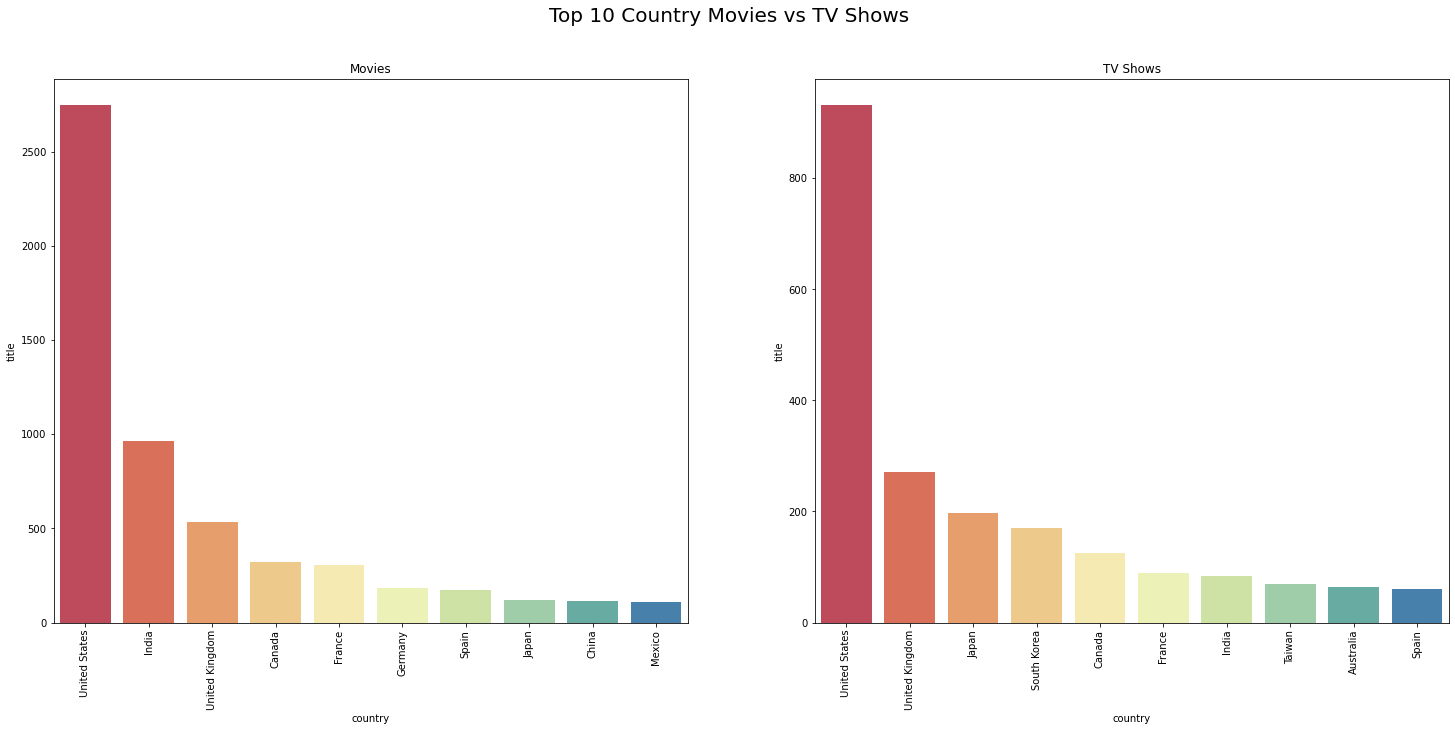

In [22]:
plt.figure(figsize=(25,10)).suptitle("Top 10 Country Movies vs TV Shows",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=mov_wise_top10, x='country', y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=TV_wise_top10, x='country', y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title("TV Shows")

plt.show()

## US, India, UK are top 3 countries, which has most of the content released so far.

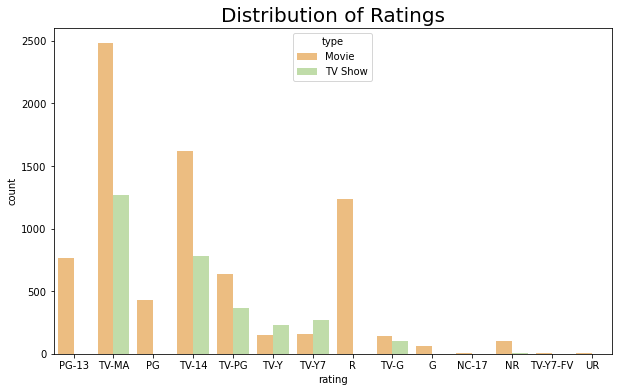

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data= df, x= 'rating', hue='type', palette=("Spectral"))
plt.title('Distribution of Ratings', fontsize=20)
plt.show()

### Distribution of Ratings

In [24]:
rating_age_groups = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_group'] = df['rating'].replace(rating_age_groups)

In [25]:
df_temp=df
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown cast,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults


In [26]:
df_temp.groupby('age_group')['title'].nunique().reset_index().sort_values('title', ascending=False)

,age_group,title
0,Adults,4089
3,Teens,2647
2,Older Kids,1487
1,Kids,567


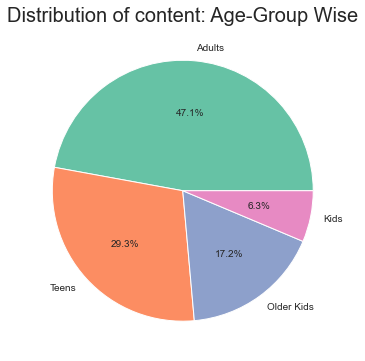

In [27]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(df.age_group.value_counts(), labels=df.age_group.value_counts().index,autopct='%1.1f%%', colors=sns.color_palette('Set2')
)
plt.title('Distribution of content: Age-Group Wise', fontsize=20)
plt.show()

## Distribution of content: Age-Group Wise shows that, Adults and teens are the biggest audience for which Netflix serves the content.

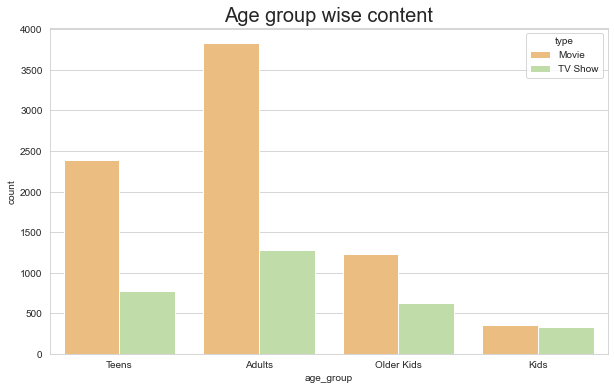

In [28]:
#content age group wise
plt.figure(figsize=(10,6))
sns.countplot(data=df_temp, x='age_group',hue='type', palette=("Spectral"))
plt.title('Age group wise content', fontsize=20)
plt.show()

In [29]:
df_temp['month_added']=df_temp['date_added'].str.split().apply(lambda x:x[0])

In [30]:
#Most movies added month wise
month_wise_mov=df_temp[df_temp.type=='Movie'].groupby('month_added')['title'].nunique().reset_index()
month_wise_mov.sort_values('title', ascending=False)

,month_added,title
5,July,565
0,April,549
2,December,547
4,January,545
10,October,545
7,March,528
1,August,518
11,September,518
9,November,498
6,June,492


In [31]:
#Most TV shows added month wise
month_wise_TV=df_temp[df_temp.type=='TV Show'].groupby('month_added')['title'].nunique().reset_index()
month_wise_TV.sort_values('title', ascending=False)

,month_added,title
2,December,265
5,July,262
11,September,251
1,August,236
6,June,236
10,October,215
0,April,214
7,March,213
9,November,207
8,May,193


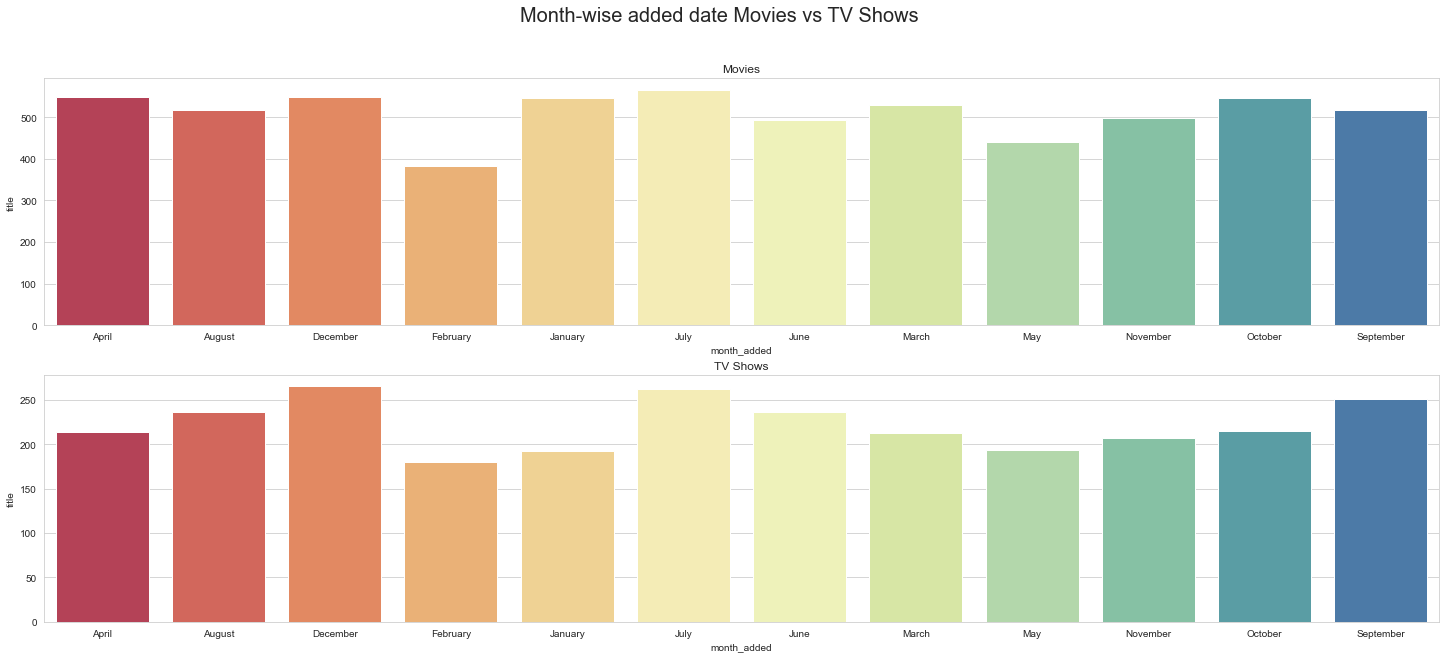

In [32]:
plt.figure(figsize=(25,10)).suptitle("Month-wise added date Movies vs TV Shows",fontsize=20)

plt.subplot(2, 1, 1)
sns.barplot(data=month_wise_mov, x='month_added', y='title', palette=("Spectral"))
plt.title("Movies")

plt.subplot(2, 1, 2)
sns.barplot(data=month_wise_TV, x='month_added', y='title', palette=("Spectral"))
plt.title("TV Shows")

plt.show()

## There is no much difference in months to release the content still, the month of July, April and December are the best months to release any content.

In [33]:
df.date_added=df.date_added.str.strip()

In [34]:
df.date_added=pd.to_datetime(df.date_added)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       10828 non-null  object        
 1   type          10828 non-null  object        
 2   title         10828 non-null  object        
 3   director      10828 non-null  object        
 4   cast          10828 non-null  object        
 5   country       10828 non-null  object        
 6   date_added    10828 non-null  datetime64[ns]
 7   release_year  10828 non-null  int64         
 8   rating        10828 non-null  object        
 9   duration      10828 non-null  object        
 10  listed_in     10828 non-null  object        
 11  description   10828 non-null  object        
 12  age_group     10828 non-null  object        
 13  month_added   10828 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 1.5+ MB


In [36]:
df['week_added']=df.date_added.dt.isocalendar().week

In [37]:
df['week_added'].unique()

<IntegerArray>
[38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39]
Length: 53, dtype: UInt32

In [38]:
df_week_mov=df[df.type=='Movie'].groupby('week_added')['title'].nunique().reset_index().sort_values('title',ascending=False).head()
df_week_mov

,week_added,title
0,1,316
43,44,243
39,40,215
8,9,206
25,26,195


In [39]:
df_week_TV=df[df.type=='TV Show'].groupby('week_added')['title'].nunique().reset_index().sort_values('title',ascending=False).head()
df_week_TV

,week_added,title
26,27,86
30,31,83
12,13,76
43,44,75
23,24,75


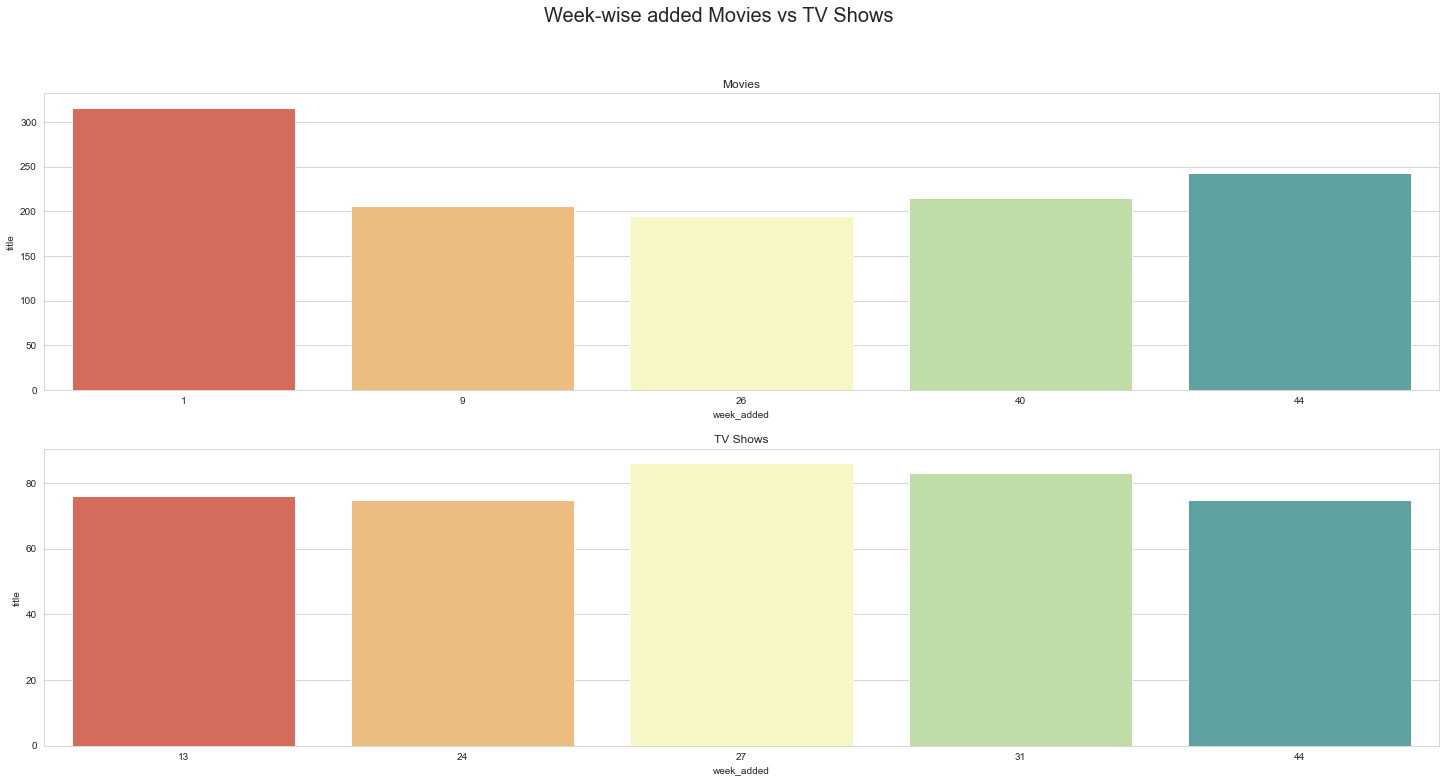

In [40]:
plt.figure(figsize=(25,12)).suptitle("Week-wise added Movies vs TV Shows",fontsize=20)

plt.subplot(2, 1, 1)
sns.barplot(data=df_week_mov, x='week_added', y='title', palette=("Spectral"))
plt.title("Movies")

plt.subplot(2, 1, 2)
sns.barplot(data=df_week_TV, x='week_added', y='title', palette=("Spectral"))
plt.title("TV Shows")

plt.show()

## Most of the movies added in the 1st week of the year are way more than the other, where as 27th week does the same for TV shows.

In [41]:
df_temp['listed_in']=df_temp['listed_in'].str.split(', ')

In [42]:
df_temp=df_temp.explode('listed_in')

In [43]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,38
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Adults,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,Adults,September,38


In [44]:
df_temp['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [45]:
#top 10 genre (Movies)
listed_wise_mov=df_temp[df_temp.type=='Movie'].groupby('listed_in')['title'].nunique().reset_index()
listed_wise_mov_top10=listed_wise_mov.sort_values('title', ascending=False).head(10)
listed_wise_mov_top10

,listed_in,title
11,International Movies,2752
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,577
14,Music & Musicals,375


In [46]:
#top 10 genre (TV Show)
listed_wise_TV=df_temp[df_temp.type=='TV Show'].groupby('listed_in')['title'].nunique().reset_index()
listed_wise_TV_top10= listed_wise_TV.sort_values('title', ascending=False).head(10)
listed_wise_TV_top10

,listed_in,title
5,International TV Shows,1349
15,TV Dramas,762
14,TV Comedies,573
3,Crime TV Shows,469
6,Kids' TV,448
4,Docuseries,394
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,252
0,Anime Series,174


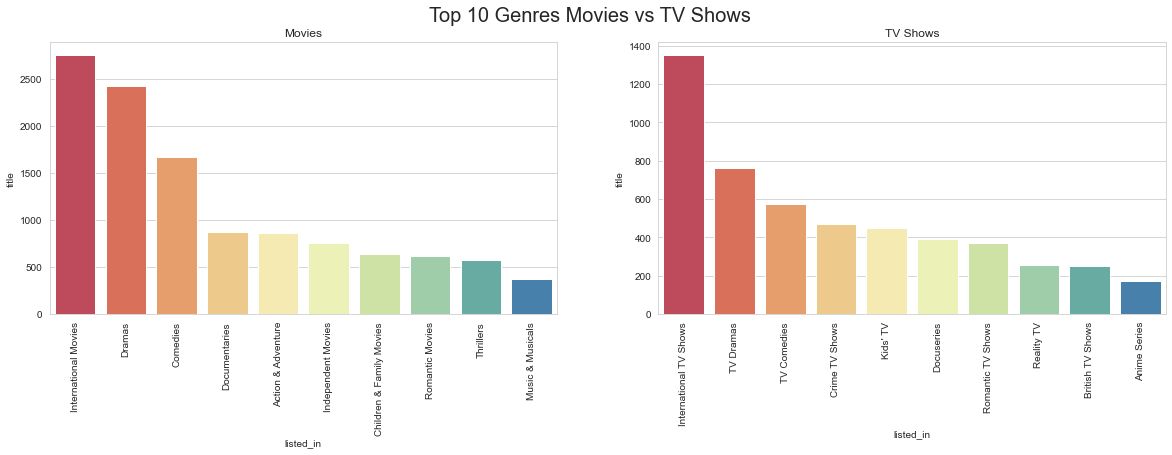

In [47]:
plt.figure(figsize=(20,5)).suptitle("Top 10 Genres Movies vs TV Shows",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=listed_wise_mov_top10, x='listed_in', y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=listed_wise_TV_top10, x='listed_in', y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title("TV Shows")

plt.show()

## International Movies and shows, Dramas, and Comedy performing best in both the types, however the documentaries in movies and crime in TV shows also working good.

In [48]:
df_cont=df_temp
df_temp.groupby(['age_group', 'country']).count()[['title','type']].reset_index().sort_values('title',ascending=False).head()

,age_group,country,title,type
97,Adults,United States,3367,3367
300,Teens,United States,1739,1739
252,Teens,India,1594,1594
218,Older Kids,United States,1266,1266
95,Adults,United Kingdom,911,911


In [49]:
teens_df=df_temp.loc[df_temp['country']!='unknown country'].groupby(['age_group', 'country'])[['title','type']].nunique().reset_index()
teens_df_top10= teens_df[teens_df.age_group=='Teens'].sort_values('title', ascending=False).head(10)
#print("teens:",teens_df_top10,'\n\n')

kids_df=df_temp.loc[df_temp['country']!='unknown country'].groupby(['age_group', 'country'])[['title','type']].nunique().reset_index()
kids_df_top10= teens_df[kids_df.age_group=='Kids'].sort_values('title', ascending=False).head(10)
#print("kids:",kids_df_top10,'\n\n')

older_kids_df=df_temp.loc[df_temp['country']!='unknown country'].groupby(['age_group', 'country'])[['title','type']].nunique().reset_index()
older_kids_df_top10= older_kids_df[kids_df.age_group=='Older Kids'].sort_values('title', ascending=False).head(10)
#print("older_kids:",older_kids_df_top10,'\n\n')


adults_df=df_temp.loc[df_temp['country']!='unknown country'].groupby(['age_group', 'country'])[['title','type']].nunique().reset_index()
adults_df_top10= teens_df[kids_df.age_group=='Adults'].sort_values('title', ascending=False).head(10)
#print("adults:",adults_df_top10,'\n\n')


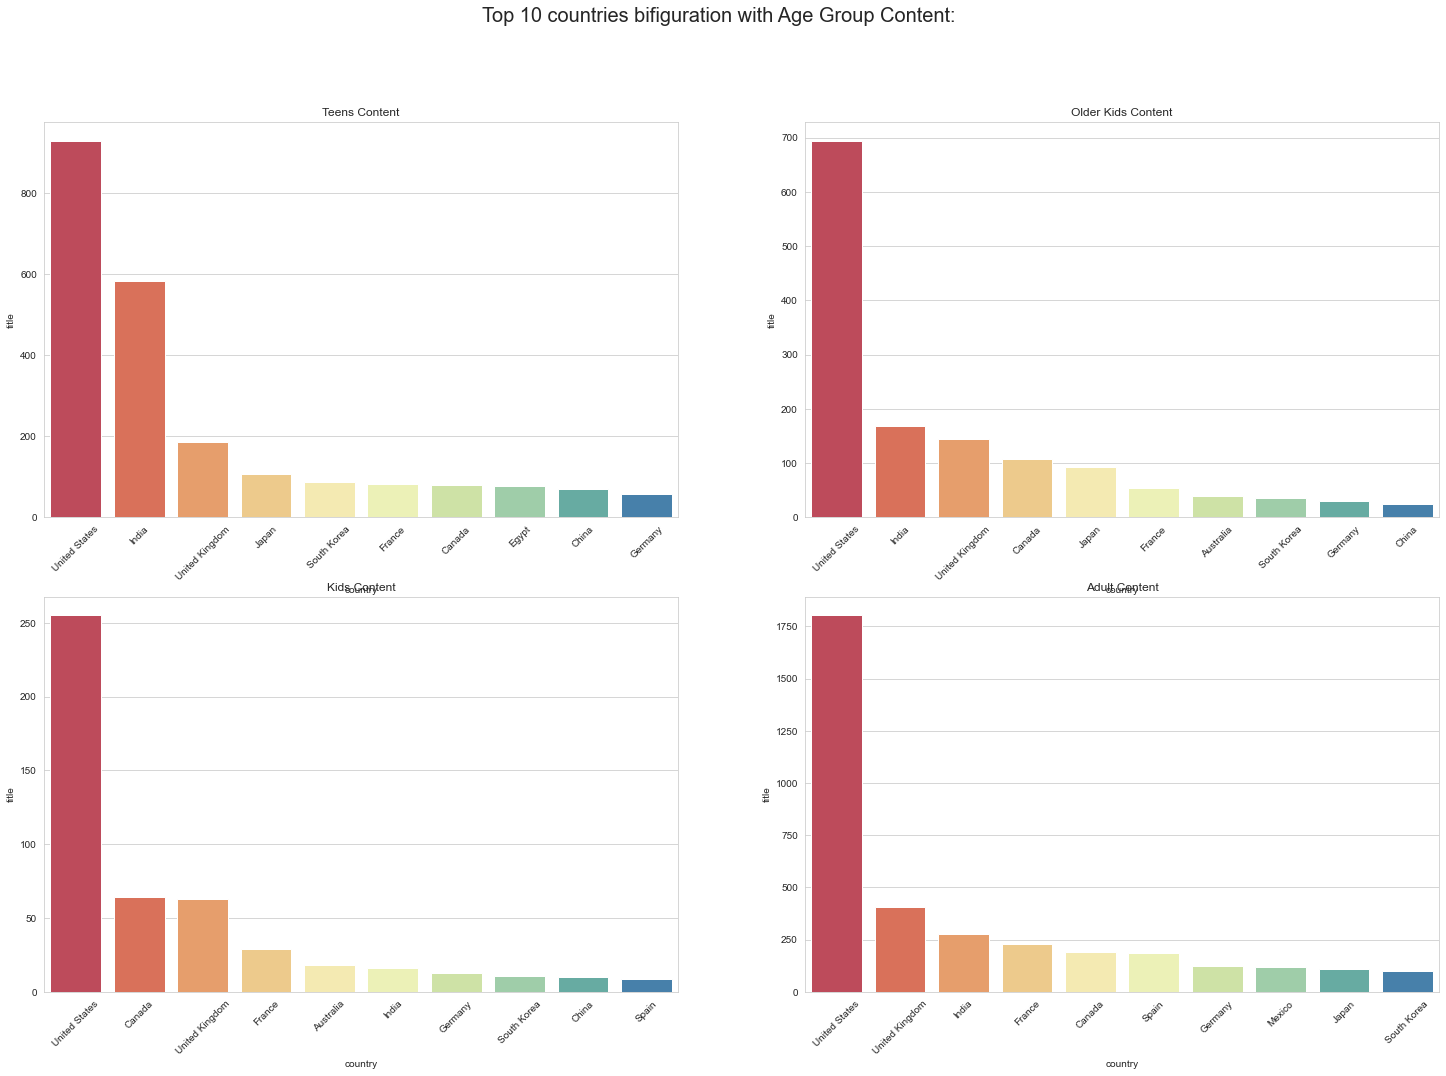

In [50]:
plt.figure(figsize=(25,16)).suptitle("Top 10 countries bifiguration with Age Group Content:",fontsize=20)

plt.subplot(2, 2, 1)
sns.barplot(data=teens_df_top10, x='country', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Teens Content")

plt.subplot(2, 2, 2)
sns.barplot(data=older_kids_df_top10, x='country', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Older Kids Content")

plt.subplot(2, 2, 3)
sns.barplot(data=kids_df_top10, x='country', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Kids Content")

plt.subplot(2, 2, 4)
sns.barplot(data=adults_df_top10, x='country', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Adult Content")

plt.show()

### 1. Top 3 countries where Netflix has teens and older kids audience are US, India and UK:
Upon analysing we could see that the teens in US and india has the variation of about 30% whereas in the older kids catrgory India is around 30% of US.
### 2. Top 3 countries where kids consume the content are US, Canada and UK:
The same pattern we could see with the US and canada audience in the kids category.
### 3. Top 3  countries with Adult audience are again the US, UK and India but in 18+ audience, India is at 3rd:
The same patterns follows here as well where UK is way less in this Category.


In [51]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,38
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Adults,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,Adults,September,38


In [52]:
df_temp['cast']=df_temp['cast'].str.split(', ')

In [53]:
df_temp=df_temp.explode('cast')

In [54]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,38
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38


In [55]:
df_movie=df_temp.loc[(df_temp['type']=='Movie') & (df_temp['cast']!='unknown cast')]
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,September,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,September,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,September,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,September,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Liza Koshy,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,September,38


In [56]:
df_mov_cast_top10=df_movie.groupby(['cast']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_mov_cast_top10

,cast,title
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
638,Akshay Kumar,30
18058,Om Puri,30
18322,Paresh Rawal,28
12026,Julie Tejwani,28
1311,Amitabh Bachchan,28
20685,Rupa Bhimani,27
3351,Boman Irani,27


In [57]:
df_TV_cast=df_temp.loc[(df_temp['type']=='TV Show') & (df_temp['cast']!='unknown cast')]
df_TV_cast_top10=df_TV_cast.groupby(['cast']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_TV_cast_top10

,cast,title
13172,Takahiro Sakurai,25
14519,Yuki Kaji,19
2863,Daisuke Ono,17
6772,Junichi Suwabe,17
14503,Yuichi Nakamura,16
252,Ai Kayano,16
14435,Yoshimasa Hosoya,15
6729,Jun Fukuyama,15
3113,David Attenborough,14
13989,Vincent Tong,13


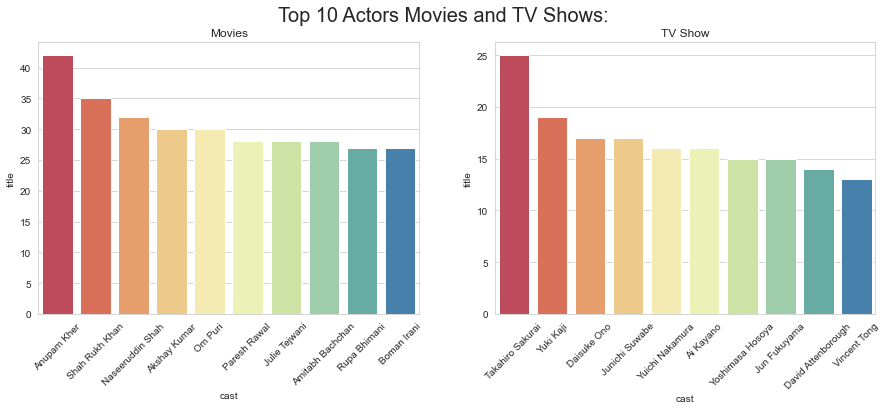

In [58]:
plt.figure(figsize=(15,5)).suptitle("Top 10 Actors Movies and TV Shows:",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=df_mov_cast_top10, x='cast', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=df_TV_cast_top10, x='cast', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("TV Show")

plt.show()

### Insights:Top 10 Actors in Both TV shows and Movies

In [59]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,38
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38


In [60]:
df_temp['director']=df_temp['director'].str.split(', ')
df_temp=df_temp.explode('director')
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,38
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38


In [61]:
df_mov_dir=df_temp.loc[(df_temp['type']=='Movie') & (df_temp['director']!='unknown director')]
df_mov_dir_top10=df_mov_dir.groupby(['director']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_mov_dir_top10

,director,title
3580,Rajiv Chilaka,22
1816,Jan Suter,21
3631,Raúl Campos,19
4259,Suhas Kadav,16
2737,Marcus Raboy,15
1861,Jay Karas,15
726,Cathy Garcia-Molina,13
2813,Martin Scorsese,12
4723,Youssef Chahine,12
1858,Jay Chapman,12


In [62]:
df_TV_dir=df_temp.loc[(df_temp['type']=='TV Show') & (df_temp['director']!='unknown director')]
df_TV_dir_top10=df_TV_dir.groupby(['director']).nunique().loc[:, 'title'].reset_index().sort_values('title', ascending=False).head(10)
df_TV_dir_top10

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
103,Iginio Straffi,2
251,Shin Won-ho,2


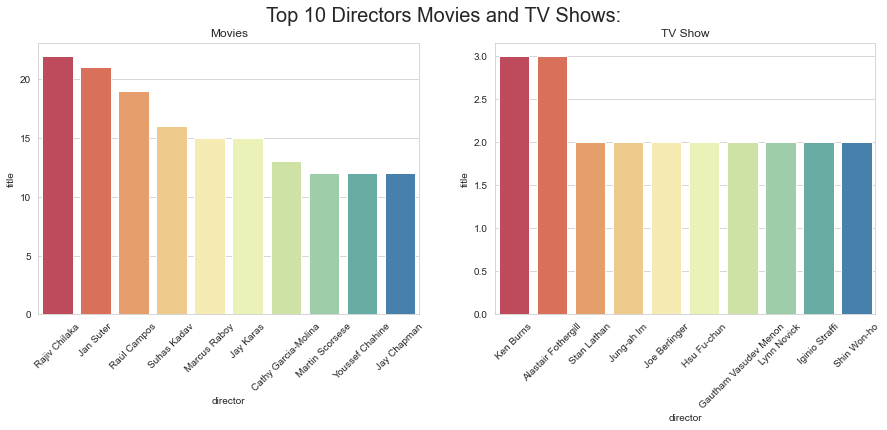

In [63]:
plt.figure(figsize=(15,5)).suptitle("Top 10 Directors Movies and TV Shows:",fontsize=20)

plt.subplot(1, 2, 1)
sns.barplot(data=df_mov_dir_top10, x='director', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("Movies")

plt.subplot(1, 2, 2)
sns.barplot(data=df_TV_dir_top10, x='director', y='title', palette=("Spectral"))
plt.xticks(rotation=45)
plt.title("TV Show")

plt.show()

### Insights:Top 10 Actors in Both TV shows and Movies

In [64]:
df_temp.groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)

,listed_in,country,title
683,International Movies,India,864
501,Dramas,United States,835
232,Comedies,United States,680
442,Dramas,India,662
372,Documentaries,United States,511
...,...,...,...
754,International TV Shows,Austria,1
755,International TV Shows,Azerbaijan,1
762,International TV Shows,Croatia,1
763,International TV Shows,Cuba,1


In [65]:
Mov_list_US=df_temp.loc[(df_temp.type=='Movie') & (df_temp.country=='United States')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
Mov_list_IN=df_temp.loc[(df_temp.type=='Movie') & (df_temp.country=='India')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
Mov_list_UK=df_temp.loc[(df_temp.type=='Movie') & (df_temp.country=='United Kingdom')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)


In [66]:
TV_list_US=df_temp.loc[(df_temp.type=='TV Show') & (df_temp.country=='United States')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)
TV_list_IN=df_temp.loc[(df_temp.type=='TV Show') & (df_temp.country=='India')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)
TV_list_UK=df_temp.loc[(df_temp.type=='TV Show') & (df_temp.country=='United Kingdom')].groupby(['listed_in','country'])['title'].nunique().reset_index().sort_values('title', ascending=False)


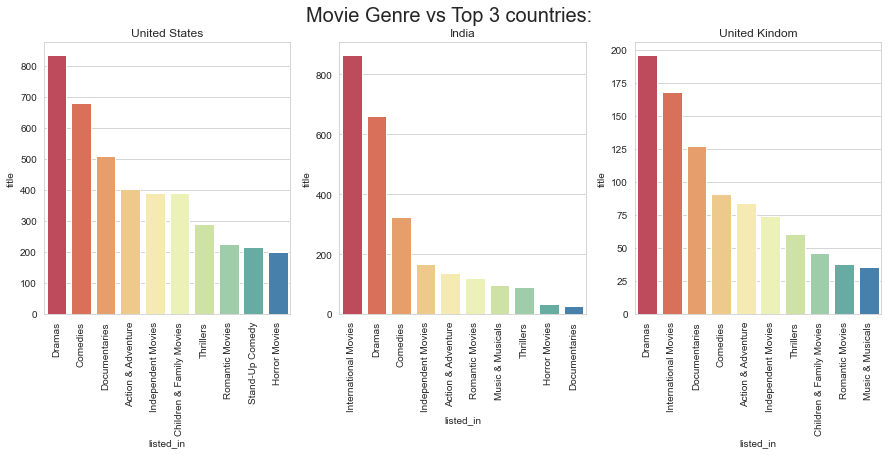

In [67]:
plt.figure(figsize=(15,5)).suptitle("Movie Genre vs Top 3 countries:", fontsize=20)

plt.subplot(1,3,1)
sns.barplot(data=Mov_list_US, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United States')

plt.subplot(1,3,2)
sns.barplot(data=Mov_list_IN, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('India')

plt.subplot(1,3,3)
sns.barplot(data=Mov_list_UK, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United Kindom')

plt.show()

### Insight: In Movie type, Top 3 counties with top 10 genres, where US and UK has Drama on the top where, in India International movies performs well, along with documentories and comedies which is almost same for all there.

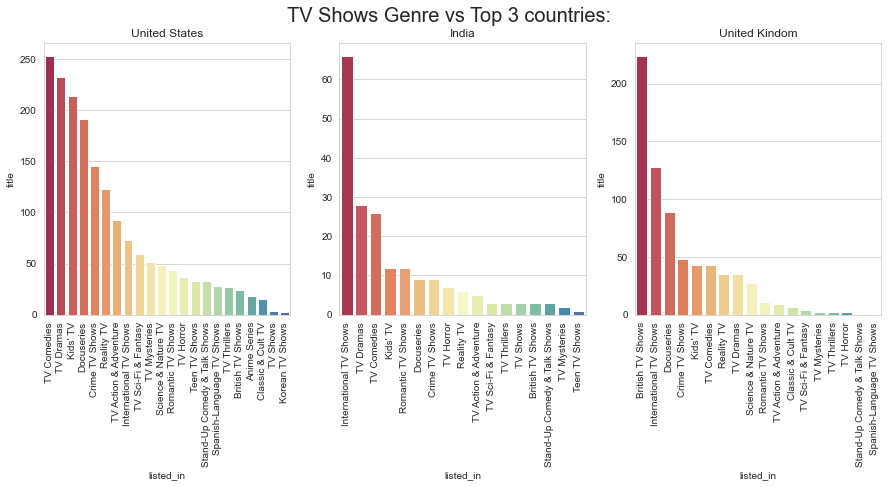

In [68]:
plt.figure(figsize=(15,5)).suptitle("TV Shows Genre vs Top 3 countries:", fontsize=20)

plt.subplot(1,3,1)
sns.barplot(data=TV_list_US, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United States')

plt.subplot(1,3,2)
sns.barplot(data=TV_list_IN, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('India')

plt.subplot(1,3,3)
sns.barplot(data=TV_list_UK, x='listed_in',y='title', palette=("Spectral"))
plt.xticks(rotation=90)
plt.title('United Kindom')

plt.show()

### Insight: In TV shows, Top 3 counties with top 10 genres, where TV comedy, drama and kids TV is most consumed in US, UK has British TV shows, and International Shows performed well, in India International TV, TV comedies and documentories do the same.

In [69]:
df_mov['year_added']=df_mov['date_added'].str.split().apply(lambda x:x[-1])

<ipython-input-69-ccb72af2cc26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_added']=df_mov['date_added'].str.split().apply(lambda x:x[-1])


In [70]:
df_mov['release_year'].astype('int')

0       2020
6       2021
7       1993
7       1993
7       1993
        ... 
8801    2015
8802    2007
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 7809, dtype: int32

In [71]:
df_mov['year_added']=df_mov['year_added'].astype('int')

<ipython-input-71-cb16f0efc2a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_added']=df_mov['year_added'].astype('int')


In [72]:
df_mov['year_diff']=df_mov['year_added'] - df_mov['release_year']
df_mov.head()

<ipython-input-72-e3ce5891d6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['year_diff']=df_mov['year_added'] - df_mov['release_year']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,year_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,28


In [73]:
print('min:',df_mov['year_added'].min())
print('max:', df_mov['year_added'].max())

min: 2008
max: 2021


In [74]:
df_mov['year_diff'].mean()

5.793955692150083

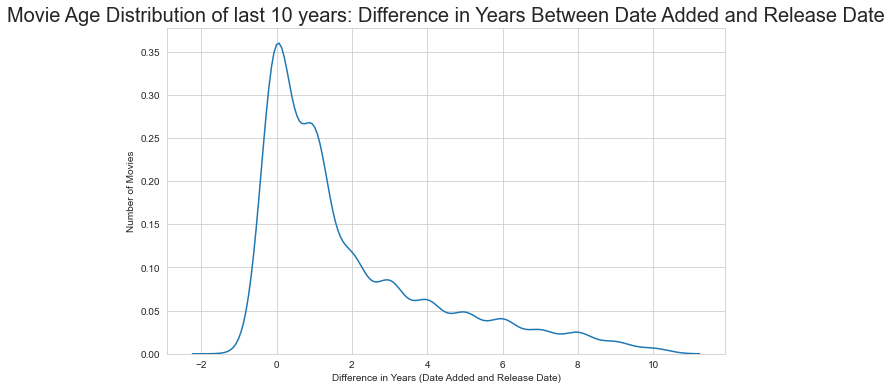

In [75]:
#Last 10 years 
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_mov[df_mov.release_year>=2011], x='year_diff', palette=("Spectral"))
plt.xlabel('Difference in Years (Date Added and Release Date)')
plt.ylabel("Number of Movies")
plt.title("Movie Age Distribution of last 10 years: Difference in Years Between Date Added and Release Date", fontsize=20)
plt.show()


In [76]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,September,38
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38
1,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adults,September,38


### Insights: Upon checking we could we see that the major content on the Netflix is added within an year or two, so for any content which is released on the platform after 5-8 years is less and so on.

In [77]:
df_temp['year_added']=df_temp['date_added'].dt.year

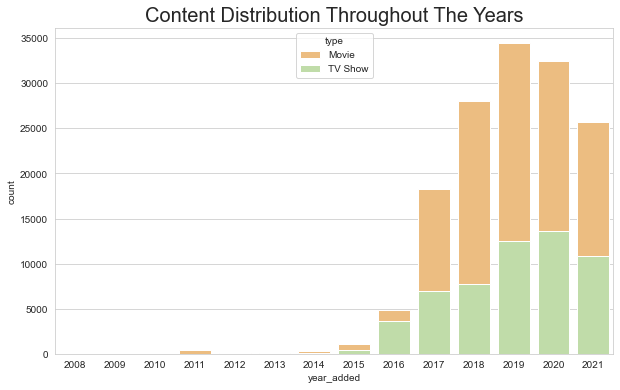

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_temp, x='year_added', hue='type', dodge=False, palette=("Spectral"))
plt.title('Content Distribution Throughout The Years', fontsize=20)
plt.show()

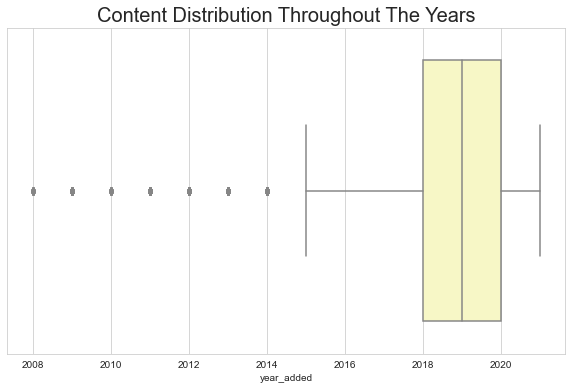

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_temp, x='year_added', hue='type', dodge=False, palette=("Spectral"))
plt.title('Content Distribution Throughout The Years', fontsize=20)
plt.show()

## Insights: After some more analysis, found that the year 2019 was the best year for the platform, where it could be seen that from 2016 to 2018, there is a good growth in the content and in 2019, there is a peak.

In [80]:
df_mov['duration_min']=df_mov['duration'].str.split(' ').apply(lambda x:x[0])

<ipython-input-80-9b45d6a80232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['duration_min']=df_mov['duration'].str.split(' ').apply(lambda x:x[0])


In [81]:
df_mov['duration_min'].unique()

array(['90', '91', '125', '104', '127', '67', '94', '161', '61', '166',
       '147', '103', '97', '106', '111', '110', '105', '96', '124', '116',
       '98', '23', '115', '122', '99', '88', '100', '102', '93', '95',
       '85', '83', '113', '13', '182', '48', '145', '87', '92', '80',
       '117', '128', '119', '143', '114', '118', '108', '63', '121',
       '142', '154', '120', '82', '109', '101', '86', '229', '76', '89',
       '156', '112', '107', '129', '135', '136', '165', '150', '133',
       '70', '84', '140', '78', '64', '59', '139', '69', '148', '189',
       '141', '130', '138', '81', '132', '123', '65', '68', '66', '62',
       '74', '131', '39', '46', '38', '126', '155', '159', '137', '12',
       '273', '36', '34', '77', '60', '49', '58', '72', '204', '212',
       '25', '73', '29', '47', '32', '35', '71', '149', '33', '15', '54',
       '224', '162', '37', '75', '79', '55', '158', '164', '173', '181',
       '185', '21', '24', '51', '151', '42', '22', '134', '177', '52

In [82]:
df_mov_min=df_mov.groupby('duration_min')['title'].nunique().reset_index().sort_values('title',ascending=False).head(10)
df_mov_min

,duration_min,title
195,90,152
198,93,146
199,94,146
202,97,146
196,91,144
200,95,137
201,96,130
197,92,129
3,102,122
203,98,120


In [83]:
df_mov['duration_min']=df_mov['duration_min'].astype('int')

<ipython-input-83-1571f0763d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov['duration_min']=df_mov['duration_min'].astype('int')


In [84]:
df_mov['duration_min'].mean()

100.41567422205148

### Insights: Avarage duration to be work on the platform should have the sceentime of around 100 min.

In [85]:
df_TV['duration_season']=df_TV['duration'].str.split(' ').apply(lambda x:x[0])

<ipython-input-85-7dd1096f76ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TV['duration_season']=df_TV['duration'].str.split(' ').apply(lambda x:x[0])


In [86]:
df_TV['duration_season'].unique()

array(['2', '1', '9', '4', '5', '3', '6', '7', '10', '8', '17', '13',
       '15', '12', '11'], dtype=object)

In [87]:
df_TV['duration_season']=df_TV['duration_season'].astype('int')

<ipython-input-87-7d938c21c5f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TV['duration_season']=df_TV['duration_season'].astype('int')


In [88]:
df_TV['duration_season'].mean()

1.7886717456111294

### Insights: For TV shows we could say that the Avarage lenght of any show is around 1.7 season, means shows with around 1-2 seasons works good on the platform

In [89]:
df_TV_season=df_TV.groupby('duration_season')['title'].nunique().reset_index().sort_values('title', ascending=False).head(10)
df_TV_season

,duration_season,title
0,1,1791
1,2,421
2,3,198
3,4,94
4,5,64
5,6,33
6,7,23
7,8,17
8,9,9
9,10,6


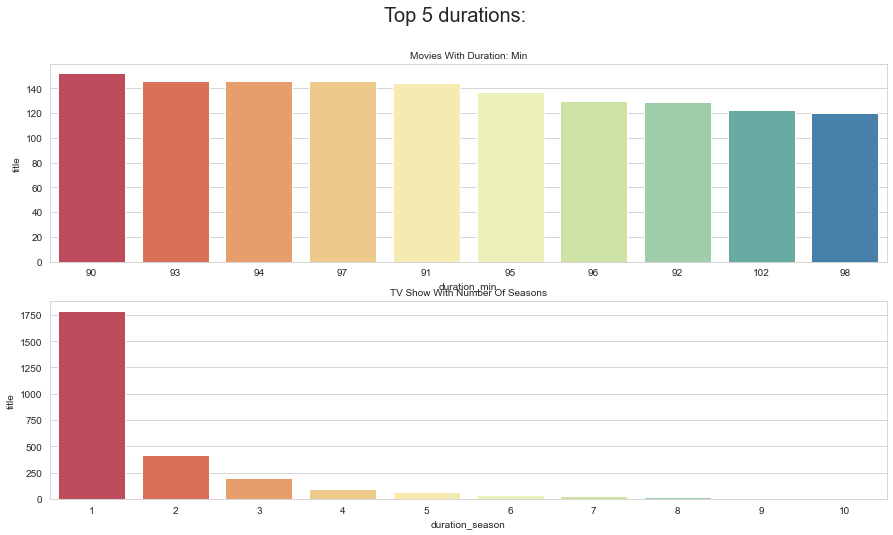

In [90]:
plt.figure(figsize=(15,8)).suptitle("Top 5 durations:",fontsize=20)

plt.subplot(2,1,1)
sns.barplot(data=df_mov_min, x='duration_min', y='title', palette=("Spectral"))
plt.title('Movies With Duration: Min', fontsize=10)

plt.subplot(2,1,2)
sns.barplot(data=df_TV_season, x='duration_season', y='title', palette=("Spectral"))
plt.title('TV Show With Number Of Seasons', fontsize=10)
           
plt.show()

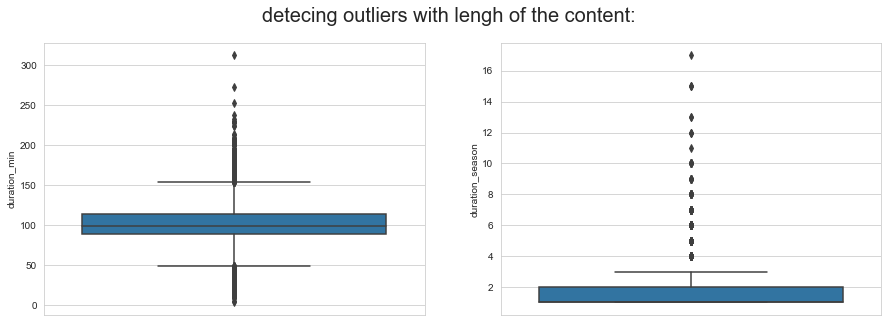

In [91]:
plt.figure(figsize=(15,5)).suptitle("detecing outliers with lengh of the content:",fontsize=20)

plt.subplot(1,2,1)
sns.boxplot(data=df_mov, y='duration_min')

plt.subplot(1,2,2)
sns.boxplot(data=df_TV, y='duration_season')

plt.show()

### Insights: We could also see that there are shows with more seasons ass well along with the Movies with long sceentime, but they are way less in number which could be called as the outliers

# Recomendations:

1. As there is only 28% of TV shows, Netflix should produce more TV shows.
2. Most of the content is for Adult, there are less content available for teens in other countries, so content should be balanced.
3. Movies release in the first week i.e january tends to have more impact, whereas 27th week for TV shows thats is july, so its recommended to release in the same time.
4. International Movies/TV Shows, Dramas, Comedies, working for both the types, whereas documentries work in movies and Crime drama works for TV Shows, its recommened to make more content on the same for popularity, also should make different genres as well content for more diverse genre.
5. In Movie type, Top 3 counties with top 10 genres, where US and UK has Drama on the top where, in India International movies performs well, along with documentories and comedies which is almost same for all there, so producing the same content may help with popularity.
6. In TV shows, Top 3 counties with top 10 genres, where TV comedy, drama and kids TV is most consumed in US, UK has British TV shows, and International Shows performed well, in India International TV, TV comedies and documentories do the same, so producing the same content may help with popularity.
7. As the majority of the content added within an year or two of the release works well, it is recommended to add content in within a year of release.
8. The screentime of Movies should be around 80-100 mins as its works well in the past, same goes of the TV shows, shows with around 1-2 seasons works well so recommended to produced the same.
